# Olympic Data Analysis

* ID - Unique number for each athlete;
* Name - Athlete's name;
* Sex - M or F;
* Age - Integer;
* Height - In centimeters;
* Weight - In kilograms;
* Team - Team name;
* NOC - National Olympic Committee 3-letter code;
* Games - Year and season;
* Year - Integer;
* Season - Summer or Winter;
* City - Host city;
* Sport - Sport;
* Event - Event;
* Medal - Gold, Silver, Bronze, or NA.

In [668]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

pd.set_option("max_columns",None)

sns.set_palette("rocket")
sns.set_context('notebook',font_scale = 1.2)

In [669]:
data = pd.read_csv("F:\Olympic.csv")
region = pd.read_csv(r"F:\noc_regions.csv")

In [670]:
data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [671]:
region.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [672]:
data.shape

(228639, 15)

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228639 entries, 0 to 228638
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      228639 non-null  int64  
 1   Name    228639 non-null  object 
 2   Sex     228639 non-null  object 
 3   Age     220608 non-null  float64
 4   Height  177695 non-null  float64
 5   Weight  175303 non-null  float64
 6   Team    228639 non-null  object 
 7   NOC     228639 non-null  object 
 8   Games   228639 non-null  object 
 9   Year    228639 non-null  int64  
 10  Season  228639 non-null  object 
 11  City    228639 non-null  object 
 12  Sport   228639 non-null  object 
 13  Event   228639 non-null  object 
 14  Medal   33200 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 26.2+ MB


In [674]:
# Merge data with region to get region name

data = data.merge(region, on="NOC", how="left")
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [675]:
# We will be working only on Summer Olympics
data = data[data.Season=="Summer"]

In [676]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         7783
Height     43802
Weight     45579
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     159327
region       251
notes     184026
dtype: int64

In [677]:
medal_temp = pd.DataFrame(data.groupby(["Year","region","Medal"])["Medal"].count())
medal_temp.columns=["Count"]
medal_temp = medal_temp.reset_index()

medal_temp = pd.pivot_table(medal_temp, "Count",["Year","region"],"Medal").fillna(0)
medal_temp = medal_temp.reset_index()
medal_temp.head()

Medal,Year,region,Bronze,Gold,Silver
0,1896,Australia,1.0,2.0,0.0
1,1896,Austria,2.0,2.0,1.0
2,1896,Denmark,3.0,1.0,2.0
3,1896,France,2.0,5.0,3.0
4,1896,Germany,1.0,21.0,3.0


In [678]:
medal_temp["Gold"][medal_temp.region=="India"].sum()

124.0

In [679]:
medal_tally = data.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])
# medal_tally.head()

medal_tally = pd.DataFrame(medal_tally.groupby(["Year","region","Medal"])["Medal"].count())
medal_tally.columns=["Count"]
medal_tally = medal_tally.reset_index()

medal_tally = pd.pivot_table(medal_tally, "Count",["Year","region"],"Medal").fillna(0)
medal_tally = medal_tally.reset_index()
medal_tally.head()

Medal,Year,region,Bronze,Gold,Silver
0,1896,Australia,1.0,2.0,0.0
1,1896,Austria,2.0,2.0,1.0
2,1896,Denmark,3.0,1.0,2.0
3,1896,France,2.0,5.0,3.0
4,1896,Germany,1.0,5.0,3.0


In [680]:
medal_tally["Gold"][medal_tally.region=="India"].sum()

9.0

Now, the value count is matching.

In [681]:
medal_tally["Total"] = medal_tally["Bronze"]+medal_tally["Gold"]+medal_tally["Silver"]
medal_tally.sort_values(by="Gold",ascending=False).head()

Medal,Year,region,Bronze,Gold,Silver,Total
635,1984,USA,27.0,75.0,52.0,154.0
43,1904,USA,59.0,72.0,64.0,195.0
585,1980,Russia,40.0,70.0,61.0,171.0
676,1988,Russia,33.0,51.0,27.0,111.0
78,1908,UK,34.0,50.0,46.0,130.0


# Top 20 Medals Based on Region

In [682]:
def top20_medal(medal):
    plt.figure(figsize=(10,6))
    temp = medal_tally.groupby("region")[medal].sum().reset_index().sort_values(medal, ascending=False)[:20]
    sns.barplot(data=temp, x="region",y=medal, palette=sns.color_palette('rocket'))
    plt.xticks(rotation=90)
    plt.show()

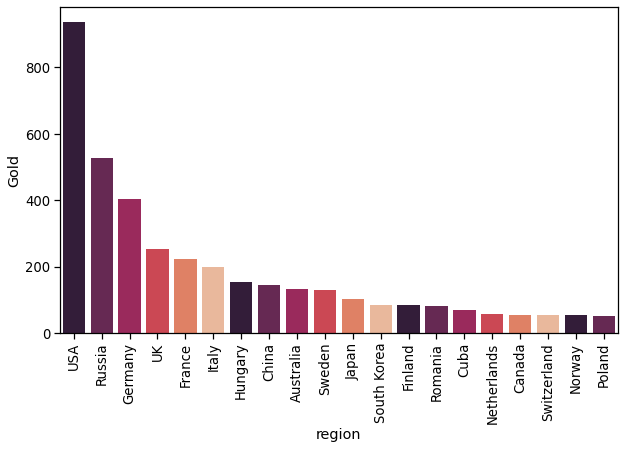

In [683]:
top20_medal("Gold")

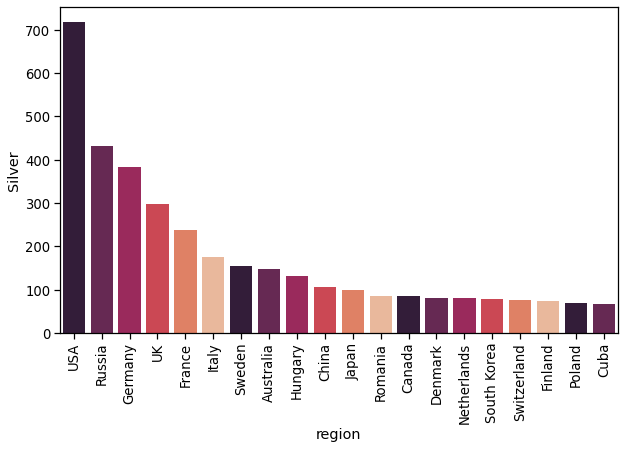

In [684]:
top20_medal("Silver")

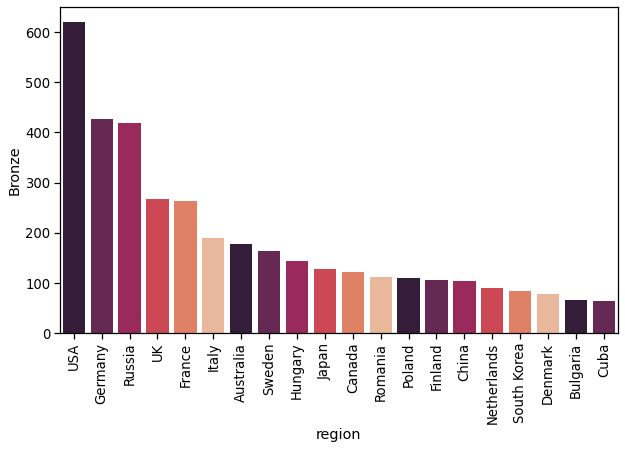

In [685]:
top20_medal("Bronze")

USA is Leading in all the Categories.

# Year Wise Medal Count

In [686]:
def top20_year_medal(medal):
    plt.figure(figsize=(17,7))
    temp = medal_tally.groupby("Year")[medal].sum().reset_index().sort_values(medal, ascending=False)[:20]
    ax = sns.barplot(data=temp, x="Year",y=medal, palette=sns.color_palette('rocket'))
    
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+1))
    
    plt.xticks(rotation=90)
    plt.show()

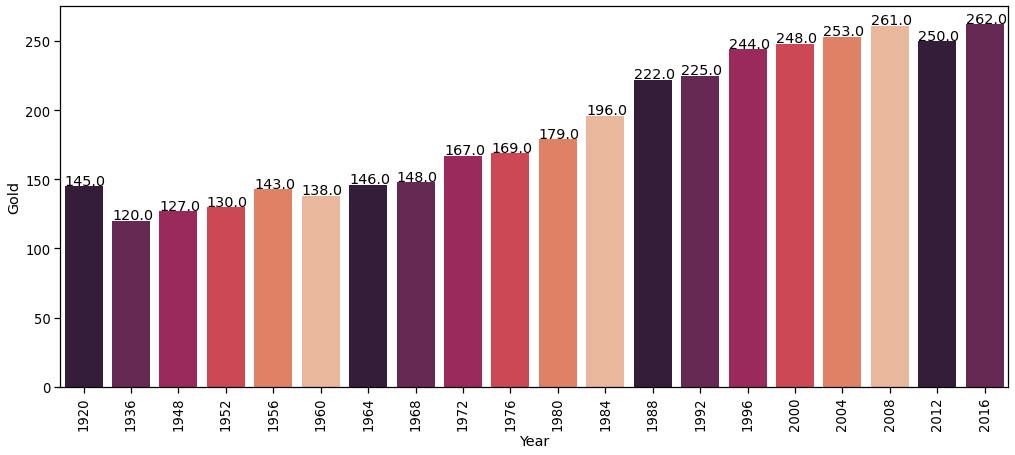

In [687]:
top20_year_medal("Gold")

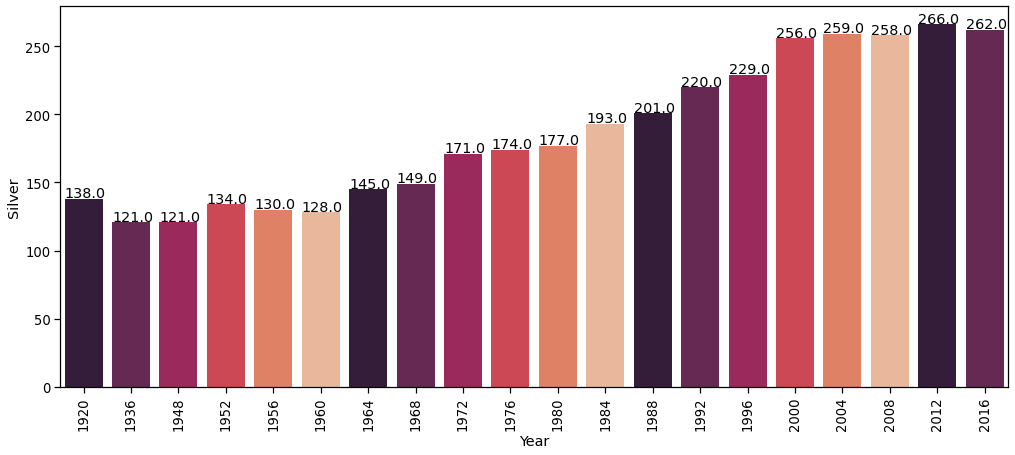

In [688]:
top20_year_medal("Silver")

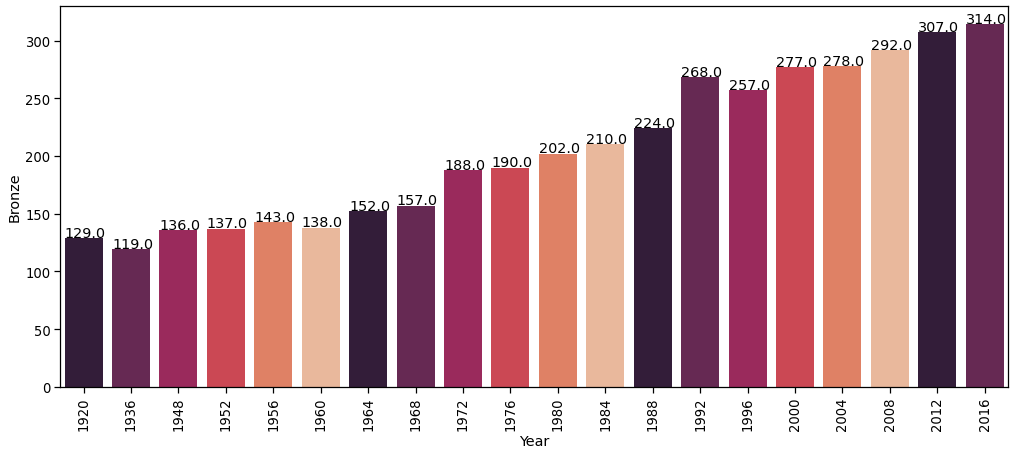

In [689]:
top20_year_medal("Bronze")

# Year Wise/Region Wise Medal Count

In [690]:
def year_region(y,r):
    return(medal_tally[(medal_tally.Year==y)&(medal_tally.region==r)])
    

In [691]:
year_region(2012,"India")

Medal,Year,region,Bronze,Gold,Silver,Total
1093,2012,India,4.0,0.0,2.0,6.0


# No of times olympic were played.

In [692]:
data.Year.unique().shape

(29,)

In [693]:
yy=data.Year.unique()
yy.sort()
yy

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016], dtype=int64)

#### As per Indian Express The Olympic games were cancelled because of World War I (1916) and World War II (1940 and 1944).

# Number of Cities

In [694]:
data.City.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

# Number of Sports Played In Olympic

In [695]:
data.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

# Number of Events Played.

In [696]:
data.Event.unique().shape

(651,)

# Number of Athletes Played till now.

In [697]:
data.Name.unique().shape

(98459,)

# Year Wise Nation Participated.

In [698]:
nation_temp = data.drop_duplicates(["Year","region"])["Year"].value_counts().reset_index().sort_values("index")
nation_temp.rename(columns={"index":"Year","Year":"Countries Participated"}, inplace=True)
nation_temp.head()

,Year,Countries Participated
28,1896,12
22,1900,30
27,1904,14
26,1906,20
25,1908,20


In [699]:
fig = px.line(nation_temp, x="Year",  y="Countries Participated", title="Participating Nation Over Years")
fig.show()

# Year Wise Events

In [700]:
event_temp = data.drop_duplicates(["Year","Event"])["Year"].value_counts().reset_index().sort_values("index")
event_temp.rename(columns={"index":"Year","Year":"No of Events"}, inplace=True)
event_temp.head()

,Year,No of Events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109


In [701]:
fig = px.line(event_temp, x="Year",  y="No of Events", title="Events Over Years")
fig.show()

# Athelete Over Time

In [702]:
athelete_temp = data.drop_duplicates(["Year","Name"])["Year"].value_counts().reset_index().sort_values("index")
athelete_temp.rename(columns={"index":"Year","Year":"Atheletes_Count"}, inplace=True)
athelete_temp.head()

,Year,Atheletes_Count
28,1896,147
25,1900,1072
27,1904,534
26,1906,706
23,1908,1715


In [703]:
fig = px.line(athelete_temp, x="Year",  y="Atheletes_Count", title="Athelete Over Time")
fig.show()

# Count of Events Played Yearly

In [704]:
sports_temp = data.drop_duplicates(["Year","Sport","Event"])
sports_temp.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


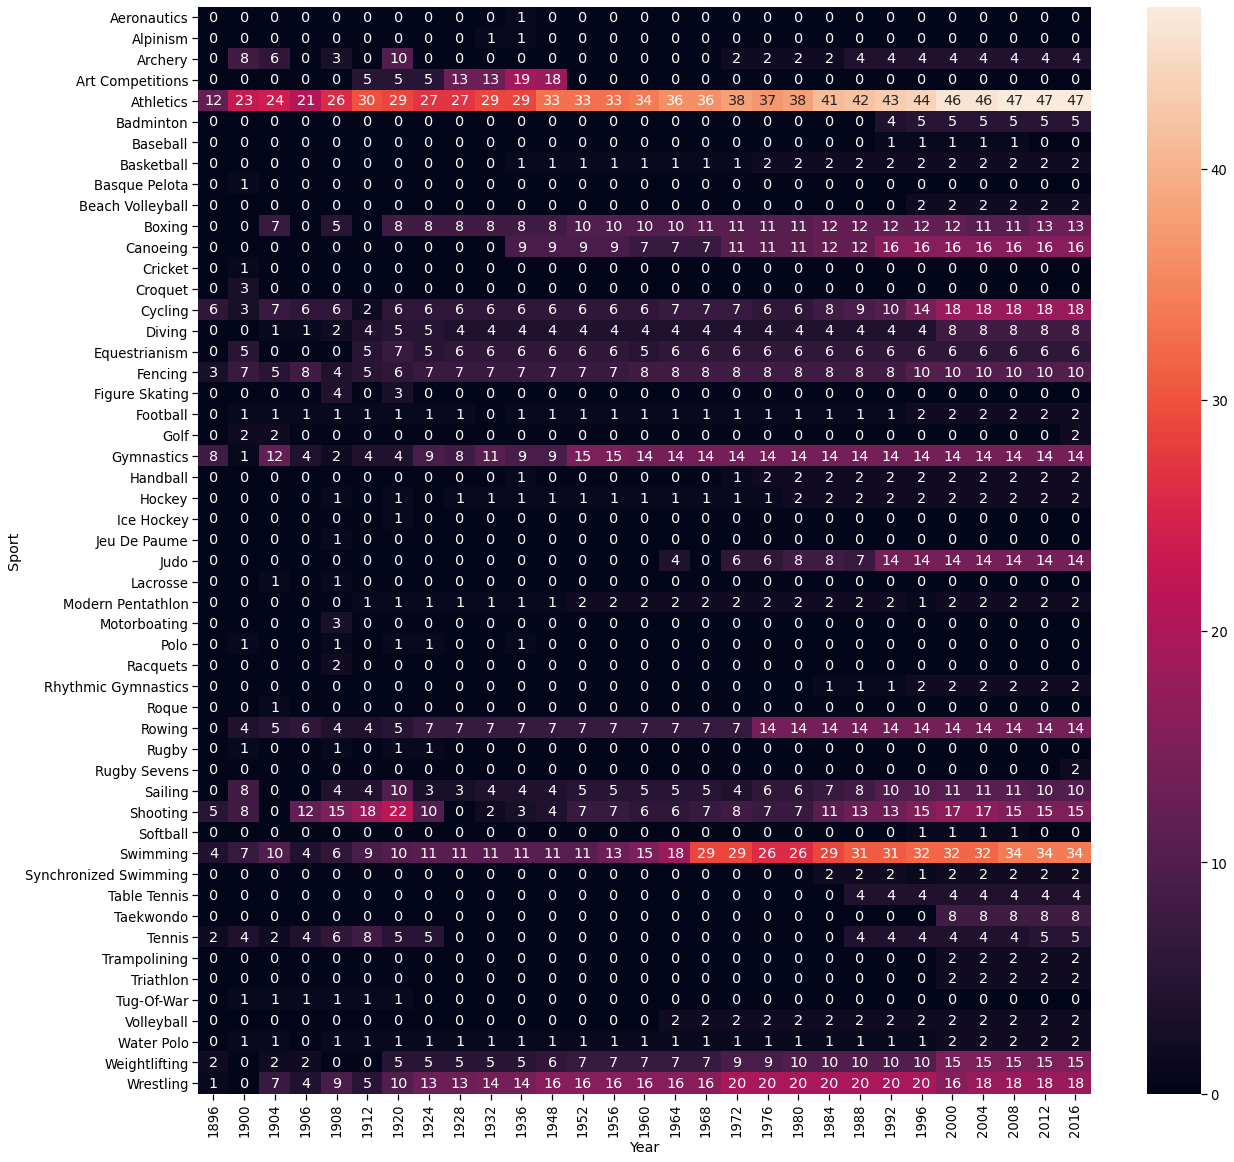

In [705]:
plt.figure(figsize=(20,20))
sns.heatmap(sports_temp.pivot_table(index="Sport",columns="Year", values="Event", aggfunc="count").fillna(0).astype(int),annot=True)
plt.show()

# Over All Top 15 Athelets - Sports wise

In [706]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=["Medal"])
    temp_df = temp_df[temp_df.Sport==sport]
    
    x = temp_df.Name.value_counts().reset_index().head(15).merge(data,left_on="index",right_on="Name",how="left")\
                        [["index","Name_x","Sport","region"]].drop_duplicates("index")
    x.rename(columns={"index":"Name","Name_x":"Medals"},inplace=True)
    return x

In [707]:
most_successful(data,"Cycling")

,Name,Medals,Sport,region
0,"Christopher Andrew ""Chris"" Hoy",7,Cycling,UK
9,Jason Francis Kenny,7,Cycling,UK
16,Burton Cecil Downing,6,Cycling,USA
23,Anna Maree Devenish Meares,6,Cycling,Australia
32,"Bradley John ""Brad"" McGee",5,Cycling,Australia
40,Marcus Latimer Hurley,5,Cycling,USA
47,Daniel Yves Morelon,5,Cycling,France
54,Jens Fiedler,5,Cycling,Germany
62,Sarah Kathryn Hammer (-Sparks),4,Cycling,USA
68,Jeannie Longo-Ciprelli,4,Cycling,France


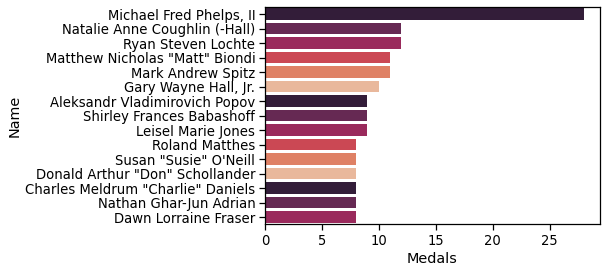

In [708]:
sns.barplot(data=most_successful(data,"Swimming"), x="Medals", y="Name", palette=sns.color_palette('rocket'))
plt.show()

# Country Wise Medal tally Per Year

In [709]:
temp_df = data.dropna(subset=["Medal"])

# In Our data set if a team is winning a medal, medal is provided to each team member. Which is incorrect. 
# Because medals are provided on the basis of Team, rather than individually. Hence removing the duplicate entries.

temp_df = data.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])
temp_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [710]:
def country_medal(country):
    new_df = temp_df[temp_df.region==country]
    final_df = new_df.groupby("Year")["Medal"].count().reset_index()
    return final_df

In [711]:
fig = px.line(country_medal("India"), x="Year",  y="Medal", title="Country Wise Medals")
fig.show()

# Country Wise - Sports Wise - Medal Tally

In [712]:
temp_df = data.dropna(subset=["Medal"])
temp_df = data.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])
temp_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [713]:
def country_sport_medal(country):
    new_df = temp_df[temp_df.region==country]
    sns.heatmap(new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0),annot=True)
    return final_df

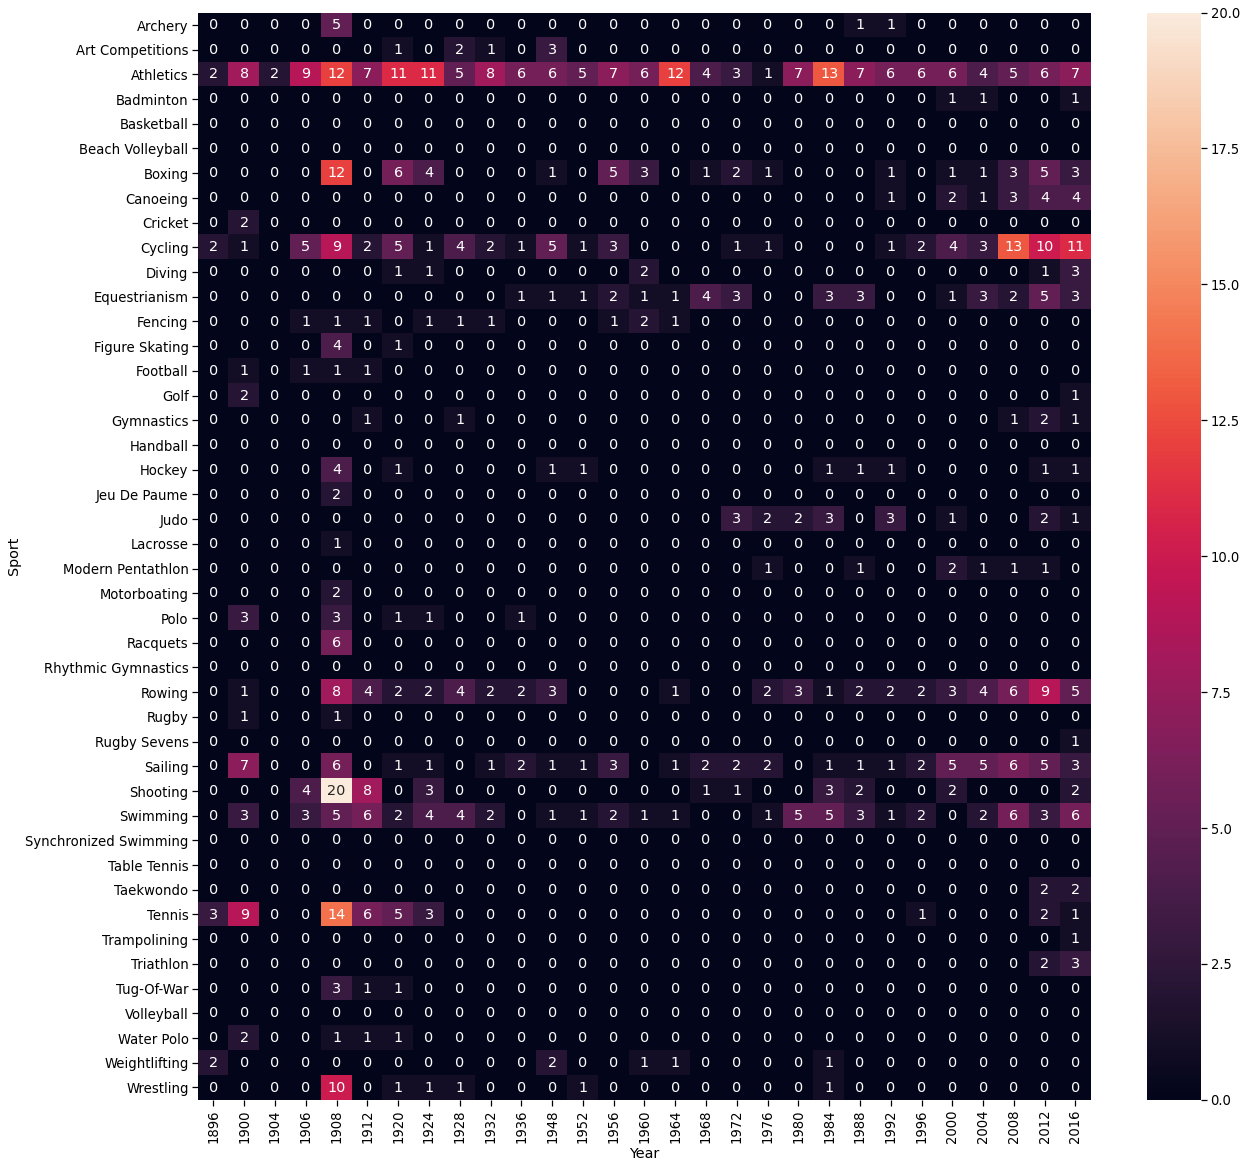

In [714]:
plt.figure(figsize=(20,20))
country_sport_medal("UK")
plt.show()

# Most Successfull Player Country Wise

In [715]:
def most_successful(df, country):
    temp_df = df.dropna(subset=["Medal"])
    temp_df = temp_df[temp_df.region==country]
    
    x = temp_df.Name.value_counts().reset_index().head(15).merge(data,left_on="index",right_on="Name",how="left")\
                        [["index","Name_x","Sport"]].drop_duplicates("index")
    x.rename(columns={"index":"Name","Name_x":"Medals"},inplace=True)
    return x

In [716]:
most_successful(data, "USA")

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,Natalie Anne Coughlin (-Hall),12,Swimming
56,Mark Andrew Spitz,11,Swimming
68,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
80,Carl Townsend Osburn,11,Shooting
96,"Gary Wayne Hall, Jr.",10,Swimming
106,"Raymond Clarence ""Ray"" Ewry",10,Athletics
116,"Frederick Carlton ""Carl"" Lewis",10,Athletics
126,Martin Joseph Sheridan,9,Athletics


# Athelete Wise Analysis

In [717]:
import plotly.figure_factory as ff

In [718]:
athlete_df = data.drop_duplicates(subset=["Name","region"])

In [719]:
x1 = athlete_df.Age.dropna()
x2 = athlete_df[athlete_df["Medal"]=="Gold"]["Age"].dropna()
x3 = athlete_df[athlete_df["Medal"]=="Silver"]["Age"].dropna()
x4 = athlete_df[athlete_df["Medal"]=="Bronze"]["Age"].dropna()

In [720]:
fig = ff.create_distplot([x1,x2,x3,x4],["OverAll","Gold Medalist","Silver Medalist","Bronze Medalist"], show_hist=False, show_rug=False)
fig.show()

# Height - Weight Comparision

In [721]:
def height_weight(sport):
    plt.figure(figsize=(15,10))
    temp_df = athlete_df[athlete_df.Sport==sport]
    temp_df.Medal.fillna("No Medal",inplace=True)
    sns.scatterplot(temp_df.Weight,temp_df.Height, hue=temp_df.Medal, style=temp_df.Sex, s=100)
    plt.show()

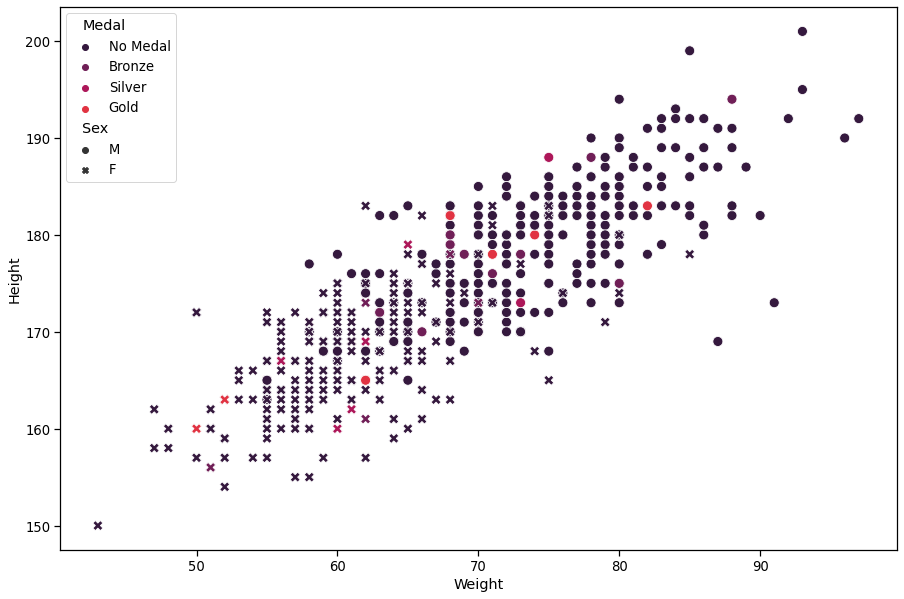

In [722]:
height_weight("Badminton")

# Over the Year Man VS Female Participation

In [723]:
men = athlete_df[athlete_df.Sex=="M"].groupby("Year")["Name"].count().reset_index()
women = athlete_df[athlete_df.Sex=="F"].groupby("Year")["Name"].count().reset_index()

final = men.merge(women, on="Year", how="left")
final = final.fillna(0)
final.rename(columns={"Name_x":"Male","Name_y":"Female"}, inplace=True)
final.head()

,Year,Male,Female
0,1896,145,0.0
1,1900,1036,22.0
2,1904,518,3.0
3,1906,637,5.0
4,1908,1505,33.0


In [724]:
fig = px.line(final, x="Year",y=["Male","Female"])
fig.show()

# END